Este notebook ilustra o Farmers Fable (Fábula dos Fazendeiros, em tradução livre). Mais informações podem ser encontradas no link [farmersfable.org](https://www.farmersfable.org). Os créditos são todos devidos aos respectivos autores e contribuidores.

Créditos do farmersfable.org:

Autor da fábula - Marc Elsberg, de seu livro Gier

Produção - David Sarac

Gráficos - Owen Cyclops

Software - Martin Erlic

Existe um fazendeiro Bill que possui uma plantação.

Em uma boa temporada, Bill colhe 150 sementes para cada 100 que ele planta.

Quando algo produz mais dela mesma, os matemáticos dizem que "ela cresce exponencialmente":
1kg aumenta para 1.5 kg, depois 1.5 kg aumenta para 2.25 kg, então para 3.375 kg e assim por diante.

Isso é o que aconteceria se 1kg de sementes fossem replantadas por 100 boas colheitas.

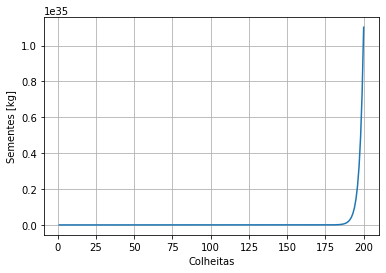

(t=1, x=1), (t=2, x=1.5), (t=3, x=2.25), ..., (t=100, x=2.7104078502347683e+17 kg ou 271 trilhões de kg)


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random

length = 200
t = np.arange(length)+1
x = [1]
for i in range(length-1):
    x.append(x[-1]*1.5)
plt.xlabel('Colheitas')
plt.ylabel('Sementes [kg]')
plt.plot(t, x)
plt.grid()
plt.show()
print('(t={}, x={}), (t={}, x={}), (t={}, x={}), ..., (t={}, x={} kg ou {} trilhões de kg)'.format(t[0],x[0],t[1],x[1],t[2],x[2],t[99],x[99],int(x[99]/10**15)))

Essa história é sobre uma coisa fascinante que acontece em crescimento exponencial. Para ver isso, nós precisamos introduzir temporadas ruins.

Em uma temporada ruim, Bill apenas colhe 70 kg de sementes para cada 100 kg que ele planta. Temporadas ruins são igualmente comuns e imprevisíveis.

Agora o que acontece? Vamos tentar 100 colheitas geradas aleatóriamente.

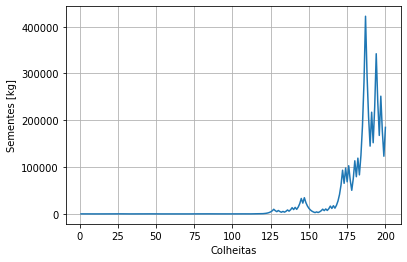

Bill: 184846.624


In [25]:
harvest_success = random.choices([0.7, 1.5], k=length-1)
harvest = [100]
for i in range(length-1):
    harvest.append(harvest[-1]*harvest_success[i])
plt.xlabel('Colheitas')
plt.ylabel('Sementes [kg]')
plt.plot(t, harvest)
plt.grid()
plt.show()
print('Bill: {:.3f}'.format(harvest[-1]))

Ann também é uma fazendeira. Ela também passa por temporadas boas e ruins.

As estações de Ann obedecem às mesmas estatísticas de Bill, mas elas são descorrelacionadas.

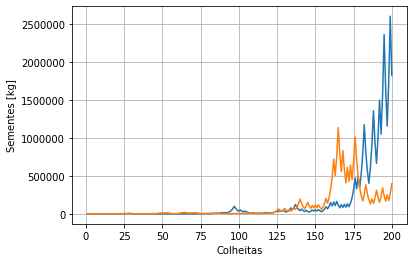

Ann(sozinha): 1818826.115, Bill(sozinho): 396099.909


In [26]:
ann_harvest_success = random.choices([0.7, 1.5], k=length-1)
bill_harvest_success = random.choices([0.7, 1.5], k=length-1)
ann_harvest = [100]
bill_harvest = [100]
for i in range(length-1):
    ann_harvest.append(ann_harvest[-1]*ann_harvest_success[i])
    bill_harvest.append(bill_harvest[-1]*bill_harvest_success[i])
plt.xlabel('Colheitas')
plt.ylabel('Sementes [kg]')
plt.plot(t, ann_harvest, t, bill_harvest)
plt.grid()
plt.show()
print('Ann(sozinha): {:.3f}, Bill(sozinho): {:.3f}'.format(ann_harvest[-1], bill_harvest[-1]))

Agora imagine que Ann e Bill fazem um pacto. No fim de cada temporada, eles juntam as suas colheitas e as dividem igualmente.

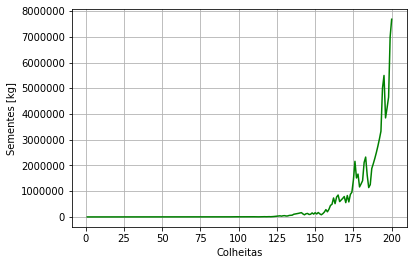

Ann(cooperando): 7680851.737, Bill(cooperando): 7680851.737


In [27]:
ann_harvest_pool = [1]
bill_harvest_pool = [1]
for i in range(length-1):
    ann_harvest_pool.append(ann_harvest_pool[-1]*ann_harvest_success[i])
    bill_harvest_pool.append(bill_harvest_pool[-1]*bill_harvest_success[i])
    pool = ann_harvest_pool[-1] + bill_harvest_pool[-1]
    ann_harvest_pool[-1] = pool/2
    bill_harvest_pool[-1] = pool/2
plt.xlabel('Colheitas')
plt.ylabel('Sementes [kg]')
plt.plot(t, ann_harvest_pool, 'g')
plt.grid()
plt.show()
print('Ann(cooperando): {:.3f}, Bill(cooperando): {:.3f}'.format(ann_harvest_pool[-1], bill_harvest_pool[-1]))

Vamos comparar para ver como eles teriam se saído se eles não tivessem compartilhado suas colheitas.

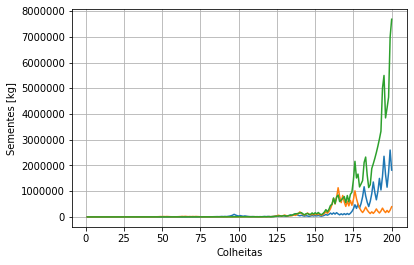

Ann(sozinha): 1818826.115, Bill(sozinho): 396099.909
Ann(cooperando): 7680851.737, Bill(cooperando): 7680851.737


In [28]:
plt.xlabel('Colheitas')
plt.ylabel('Sementes [kg]')
plt.plot(t, ann_harvest, t, bill_harvest, t, ann_harvest_pool)
plt.grid()
plt.show()
print('Ann(sozinha): {:.3f}, Bill(sozinho): {:.3f}'.format(ann_harvest[-1], bill_harvest[-1]))
print('Ann(cooperando): {:.3f}, Bill(cooperando): {:.3f}'.format(ann_harvest_pool[-1], bill_harvest_pool[-1]))

Tudo que cresce exponencialmente cresce mais rápido (sendo todo o resto igual) quando juntando e compartilhando, porque reduz flutuações.

Sem juntar e compartilhar, Ann começa com 1 pacote de trigo. Na primeira colheita ela triplica seu trigo. Na segunda colheita ela apenas iguala.

Bill também começa com 1 pacote de trigo sem compartilhar. Na primeira colheita ele iguala. Na segunda colheita, ele triplica seu trigo.

Ambos começaram com 1 pacote, e cada um terminou com 3.

Agora imagine se eles juntassem e compartilhassem:

Após a primeira colheita, Ann tem 3 e Bill tem 1. Eles juntam e dividem, e ambos tem 2 pacotes.

Na segunda colheita Ann novamente iguala para manter seus 2 pacotes. Bill novamente triplica seu trigo, dessa vez para 6 pacotes. E agora vem a grande parte: eles juntam de novo, que se torna 8 pacotes. E compartilham de novo - para terminar com 4 pacotes cada. Um a mais cada do que sem juntar e compartilhar.